down_ratio = 4


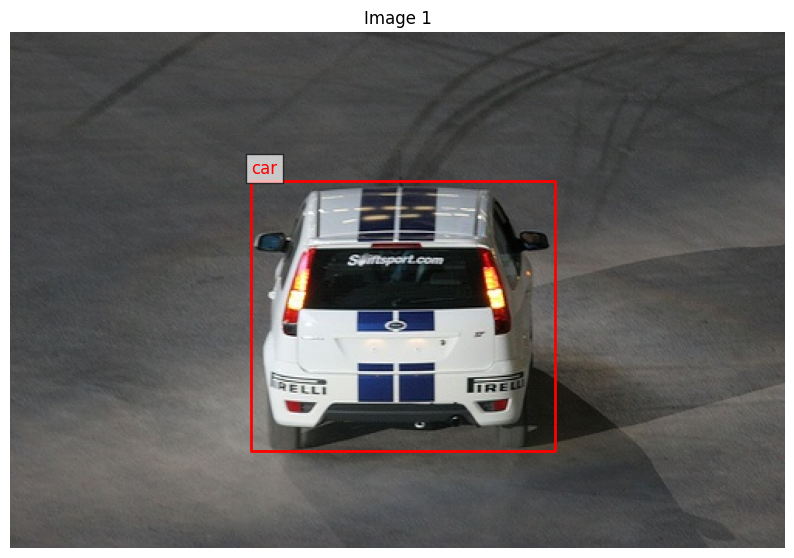

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import torch
from PIL import Image, ImageDraw
from data.data_loader import PascalVOCDataLoader, convert_coco_2_voc

def visualize_dataset():
    voc_path = "../VOC"
    coco_annotation_path = "../PASCAL_VOC/pascal_train2007.json"

    with open(coco_annotation_path) as f:
        coco_annotations = json.load(f)

    categories = {cat['id']: cat['name'] for cat in coco_annotations['categories']}

    voc_loader = PascalVOCDataLoader(dataset_path=voc_path, image_set="train")
    voc_loader.load()

    for idx in range(1):
        image, _ = voc_loader[idx]

        image_info = coco_annotations['images'][idx]
        image_id = image_info['id']
        image_annotations = [
            ann for ann in coco_annotations['annotations']
            if ann['image_id'] == image_id
        ]

        voc_targets = convert_coco_2_voc(image_annotations)

        plt.figure(figsize=(10, 10))
        plt.imshow(image)

        boxes = voc_targets['boxes']
        labels = voc_targets['labels']

        for box, label in zip(boxes, labels):
            x1, y1, x2, y2 = box.tolist()
            category_name = categories[label.item()]

            plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'r-', linewidth=2)

            plt.text(x1, y1 - 5, category_name, color='red', fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.7))

        plt.axis('off')
        plt.title(f'Image {idx + 1}')
        plt.show()

if __name__ == "__main__":
    visualize_dataset()